# X-Informatics - C.Riccio - Laboratorio - Esperimento 1


## 1.  Set up 

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals #ci stiamo assicurando appunto la compatibilità tra
                                                                  #le diverse versioni di python e stiamo importando
                                                                  # dal modulo __future__ i vari metodi che ci servono

# Common imports
import numpy as np
import os #è un modulo di python
#questo modulo ci permette ci permette di struttare le funzionalità del sistema operativo su cui operiamo tramite python
# possiamo per esempio leggere e scivere file 

# to make this notebook's output stable across runs
np.random.seed(42)#in un lavoro scientifico è buona norma impostare un seed per assicurarsi la riproducibilità
                  # degli esperimenti indipendente dalla macchina in cui sta girando lo script
                  # im particolare nella fase di train e test splitting, tale split è fatto in maniera random
                  # impostare un seed mi assicura che le stesse osservazioni sono tenute in training e test
                  # indipendentemente da chi sta facendo girare lo script
                
#Il perche al numero 42
#Dal punto di vista astronomico il 42 ha molti corrispettivi ed è molto ricorrente:
# - 42P/Neujmin è una cometa periodica del sistema solare
# - 42 Isis è un asteroide della fascia principale del sistema solare
# - NGC 42 è una galassia lenticolare della costellazione di Pegaso
# - Ipotizzando di poter piegare per 42 volte un foglio abbastanza largo, si otterrebbe una pila alta fino alla Luna. 
    #Infatti, se si considera uno spessore di 
    #0,09 mm, si raggiungerebbe un'altezza di 0,09 mm * 2^42 = 395.824 km (la distanza media terra-luna è 384.400 km)
# - Si ipotizza che la massa della Via Lattea sia 10^42 kg

# To plot pretty figures
#If using the pythong interpretor, omit this first line.  It only applies to the Jupyter environment
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(fig_id + ".png", format='png', dpi=300)
#è stata creata una funzione per salvare i plot dell'analisi 
#dei dati. format serve ad indicare il formato in cui si vuole 
#che si salvata l'immagine, dpi è per la risoluzione della stessa
#ovvero la densità di pixel per pollice

# importing data set ed esplorazione dei dati

In [2]:
from sklearn.datasets import load_iris
'''iris è un dataset di allenamento offerto dal modulo scikitilearn. Il dataset è stato creato da Edgar Anderson
il quale ha raccolto informazioni sulle variazioni morfologiche di 3 specie di fiore Iris '''
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

come è possibile bedere il metodo 'load_iris()' ci restituisce un oggetto che contiene il dataset. L'output di sopra non è molto chiaro, capiamolo meglio per avere sotto mano informazione per informazione.

In [3]:
iris.data
''' array di 150 righe e 4 colonne che rappresenta le osservazioni ed il valore di ognuna delle 4 variuabili per 
osservazione. Ma capiamo meglio queste variabili cosa sono e come si chiamano quindi'''

' array di 150 righe e 4 colonne che rappresenta le osservazioni ed il valore di ognuna delle 4 variuabili per \nosservazione. Ma capiamo meglio queste variabili cosa sono e come si chiamano quindi'

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Le 4 variabili raccolte per ogni fiore riguardano la lunghezza e la larghezza rispettivamengte di:
- petalo
- sepalo, ovvero le foglie che si trovano alal base del fiore 

In [5]:
'''il nostro obiettivo è classificare tra le diverse scpecie di fori presenti, capiamo quante ne sono e quali sono'''
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

capiamo subito che dobbiamo classificare tra 3 diverse specie di fiore i cui nomi sono presentati sopra

## capiamo i dati

### IRIS data set

Some references: https://en.wikipedia.org/wiki/Iris_flower_data_set

Studiare le caratteristiche del Data Set e descriverlo brevemente. Valutare (se possibile statisticamente) l'esistenza di correlazioni tra le variabili e eventualmente produrre garfici per visualizzarle.

In [7]:
import pandas as pd
from pandas import DataFrame

#trovo molto utile e veloce lavorare con un formato dataframe che mi può essere dato dalla libreria pandas.
#provvedo ad importarla e a trasformare il dataset iris in formato pandas data frame

iris=DataFrame(iris.data, columns=iris.feature_names, 
               index=pd.Index([i for i in range(iris.data.shape[0])])). join(DataFrame(iris.target, columns=pd.Index(["Species"]),
                                                                                      index=pd.Index([i for i in range(iris.target.shape[0])])))

In [8]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
iris.rename(columns={'sepal length (cm)': 'SepalLeng', 'sepal width (cm)':'SepalWid', 'petal length (cm)':'PetalLeng','petal width (cm)': 'PetalWid' }, inplace=True)

In [10]:
iris.Species.replace({0:'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)
iris

,SepalLeng,SepalWid,PetalLeng,PetalWid,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
iris.describe() #descrizione dei principali indici statistici per tutto il dataframe

,SepalLeng,SepalWid,PetalLeng,PetalWid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Divido le osservazioni in gruppi appartenenti alla stessa specie

In [12]:
groups=iris.groupby('Species')
for name, data in groups:
    print(name)
    print()
    print(data.iloc[:, 0:4])

setosa

    SepalLeng  SepalWid  PetalLeng  PetalWid
0         5.1       3.5        1.4       0.2
1         4.9       3.0        1.4       0.2
2         4.7       3.2        1.3       0.2
3         4.6       3.1        1.5       0.2
4         5.0       3.6        1.4       0.2
5         5.4       3.9        1.7       0.4
6         4.6       3.4        1.4       0.3
7         5.0       3.4        1.5       0.2
8         4.4       2.9        1.4       0.2
9         4.9       3.1        1.5       0.1
10        5.4       3.7        1.5       0.2
11        4.8       3.4        1.6       0.2
12        4.8       3.0        1.4       0.1
13        4.3       3.0        1.1       0.1
14        5.8       4.0        1.2       0.2
15        5.7       4.4        1.5       0.4
16        5.4       3.9        1.3       0.4
17        5.1       3.5        1.4       0.3
18        5.7       3.8        1.7       0.3
19        5.1       3.8        1.5       0.3
20        5.4       3.4        1.7       0.2
21

In [13]:
'''dividendo il dataset in gruppi posso studiarne le caratteristiche gruppo per gruppo'''

'dividendo il dataset in gruppi posso studiarne le caratteristiche gruppo per gruppo'

In [14]:
groups.describe()

SepalLeng                                             SepalWid  \
               count   mean       std  min    25%  50%  75%  max    count   
Species                                                                     
setosa          50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8     50.0   
versicolor      50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0     50.0   
virginica       50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9     50.0   

                   ... PetalLeng      PetalWid                             \
             mean  ...       75%  max    count   mean       std  min  25%   
Species            ...                                                      
setosa      3.428  ...     1.575  1.9     50.0  0.246  0.105386  0.1  0.2   
versicolor  2.770  ...     4.600  5.1     50.0  1.326  0.197753  1.0  1.2   
virginica   2.974  ...     5.875  6.9     50.0  2.026  0.274650  1.4  1.8   

                           
            50%  75%  max  
Species                    
setosa      0.2  0.3  0.6  
versicolor  1.3  1.5  1.8  
virginica   2.0  2.3  2.5  

[3 rows x 32 columns]

In [15]:
groups.mean()

,SepalLeng,SepalWid,PetalLeng,PetalWid
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [16]:
#deviazione standard 
groups.std()

,SepalLeng,SepalWid,PetalLeng,PetalWid
Species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [17]:
#varianza
groups.var()

,SepalLeng,SepalWid,PetalLeng,PetalWid
Species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [18]:
groups.median()

,SepalLeng,SepalWid,PetalLeng,PetalWid
Species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [19]:
# dimensioni fisiche per ogni fiore
groups.min()

,SepalLeng,SepalWid,PetalLeng,PetalWid
Species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [20]:
#dimensioni massime per ogni fiore
groups.max()

,SepalLeng,SepalWid,PetalLeng,PetalWid
Species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


Tutti i dati sono ugualmente distributi tra le 3 classi

# analisi esplorativa dei dati

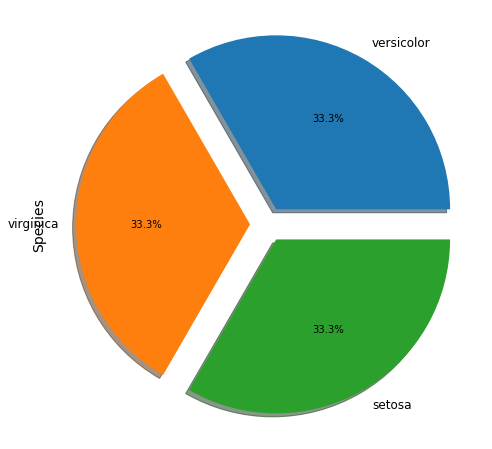

In [21]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

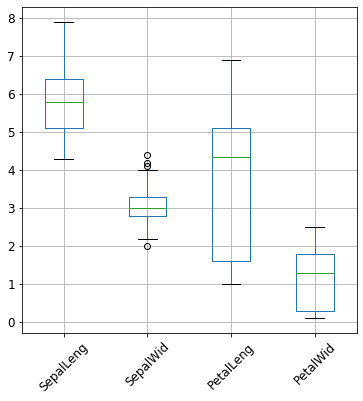

In [22]:
plt.figure(figsize=(6,6))
iris.boxplot()
plt.xticks(rotation=45)

<Figure size 720x720 with 0 Axes>

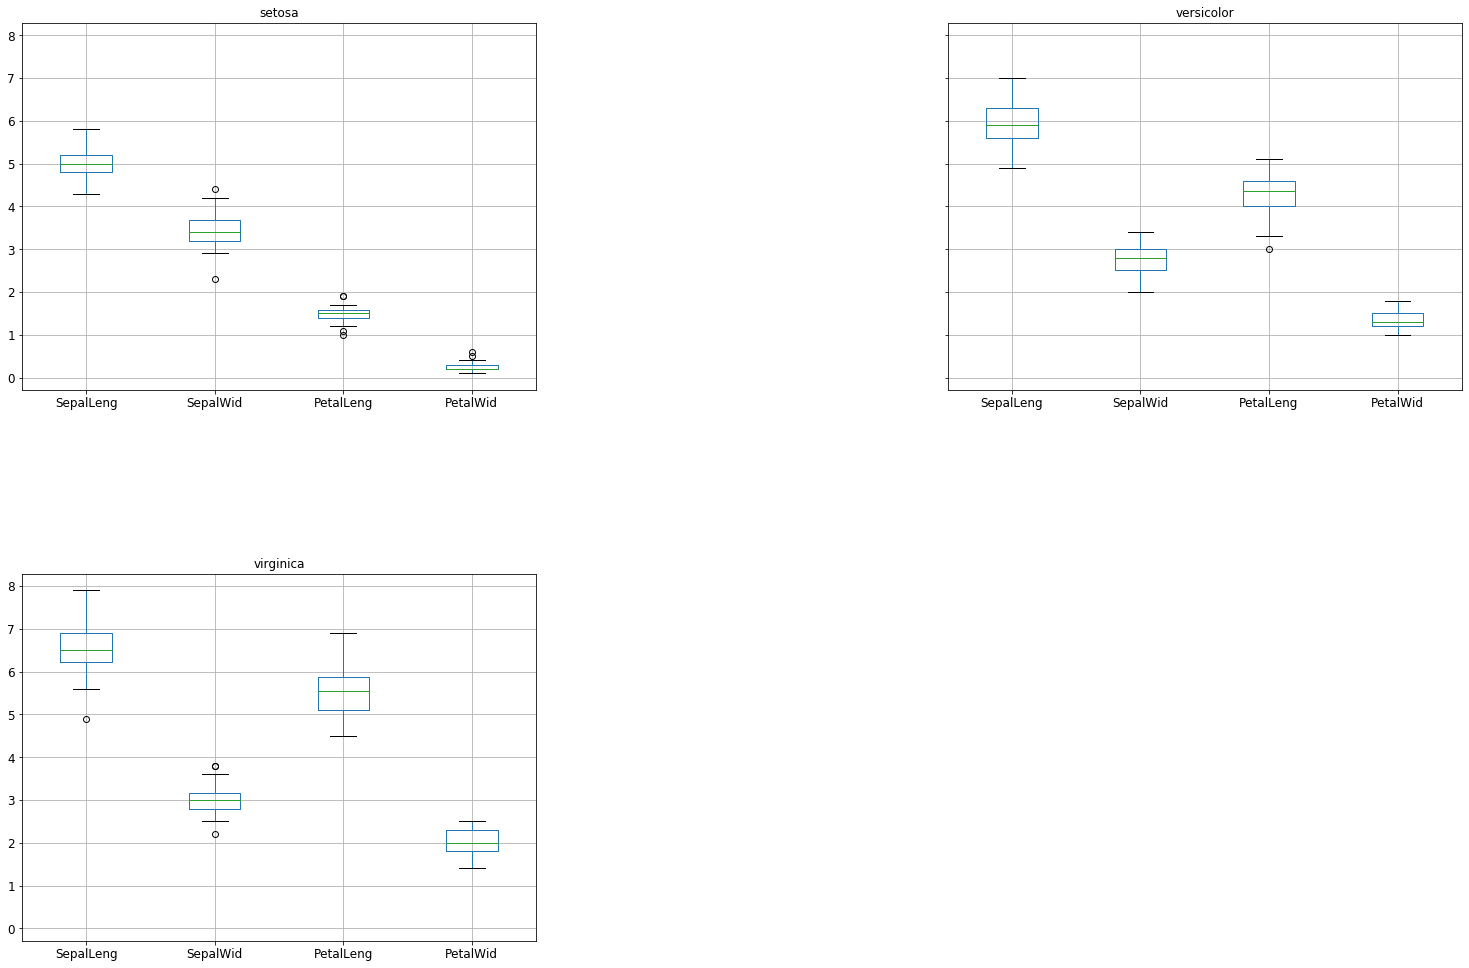

In [23]:
plt.figure(figsize=(10,10))
groups.boxplot(widths = 0.4, manage_ticks = True, figsize=(25,15))
plt.subplots_adjust(hspace = 0.5, wspace=0.8, top=1.0)


Vediamo se è presente un legame tra le variabili del dataset


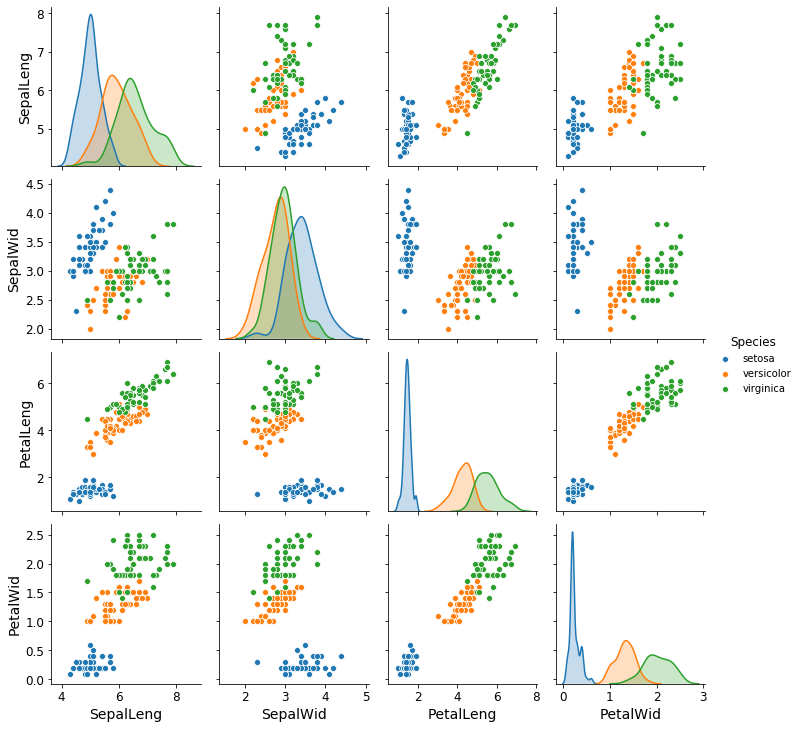

In [24]:
import seaborn as sns

sns.pairplot(iris, hue='Species')

Il pairplot è uno strumento grafico molto intuitivo, ci da delle informazioni pairwise tra le varibili presenti nel dataset. In particolare:
- gli elementi della diagonale rappresentano le distibuzioni univariate delle variabili
- gli elementi della triangolare superiore ed inferiore mostrano come sono collegate le variabili tra loro.

Interessante è il fatto che per la specie setosa, le dimensioni del petalo servano a discriminarlo dalle altre due specie.

Da una prima analisi, visiva,  si può osservare come per le 3 specie di fiori presenti la specie 'setosa' sia ben separata dalle altre due specie, che di contro, tendono a mostrare comportamenti simili per quanto riguarda alcune relazioni pairwise tra le variabili.

Dal punto di vista del ML, dovremmo essere molto bravi con un semplice algoritmo a riconoscere e separare la classe setosa dalle altre, ma potremmo soffrire nei cais in cui le specie 'setosa' e 'versicolor' presentano attributi simili.

Come sono correlate le variabili tra loro? Un ottimo indicatore ci è dato da una matrice di correlazione, costruibile con pandas e visualizzabile con matplotlib


In [25]:
corr_mat=iris.corr()
corr_mat.head()

,SepalLeng,SepalWid,PetalLeng,PetalWid
SepalLeng,1.000000,-0.117570,0.871754,0.817941
SepalWid,-0.117570,1.000000,-0.428440,-0.366126
PetalLeng,0.871754,-0.428440,1.000000,0.962865
PetalWid,0.817941,-0.366126,0.962865,1.000000


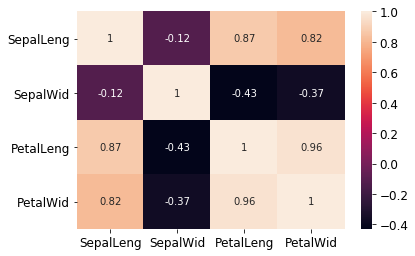

In [26]:
sns.heatmap(corr_mat, annot=True)
plt.show()

Sono formetente correlati linearmente le seguenti variabili:
    - Lunghezza petalo/ lunghezza del sepale
    - Lunghezza del petalo/ larhezza del petalo
    - lunghezza del petalo/ larghezza del petalo
    
Questo legame, sembra essere ragionevole dal punto di vista morfologico e biologico



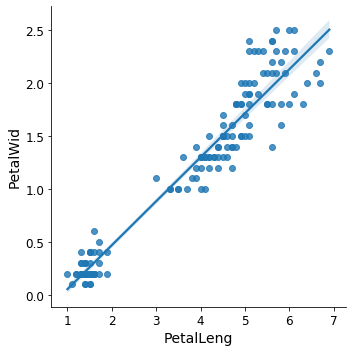

In [27]:
'''Indaghiamo meglio questo legame lineare tra le variabili'''

sns.lmplot(x='PetalLeng', y='PetalWid', data=iris)

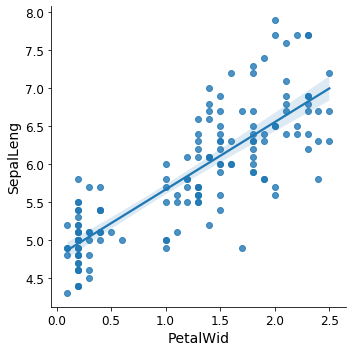

In [28]:
sns.lmplot(x='PetalWid', y='SepalLeng', data=iris)

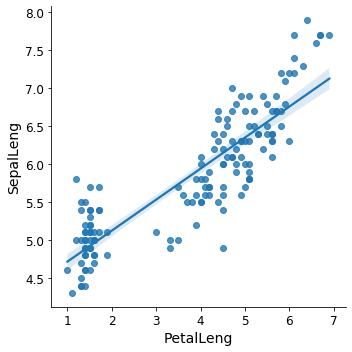

In [29]:
sns.lmplot(x='PetalLeng', y='SepalLeng', data=iris)

Decido quindi di plottare le distinuzioni bivariate di larghezza del petavo vs lunghezza del petalo e lunghezza del sepale vs largheza del sepale per ognua delle 3 specie, per ottenre i seguenti grafici, molto esplicativi e che fanno saltare all'aoochio interessanti dettagli. Il metodo kdeplot() della libreria seaborn permette di costruire grafici con la kernel density estimation function, sfruttando una distribuzione continua di probabilità per le variabili e ci permette di osservare come si distribusicono le variabili.

C:\Users\ricci\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Sepal Width ')

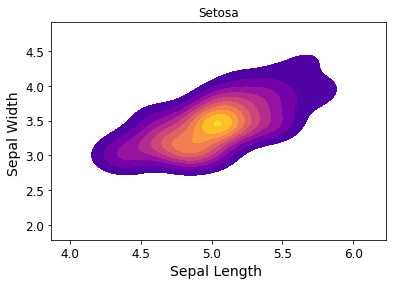

In [30]:
plot=iris[iris['Species']=='setosa']
sns.kdeplot(data=plot[['SepalLeng','SepalWid']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Setosa')
plt.xlabel('Sepal Length ')
plt.ylabel('Sepal Width ')

C:\Users\ricci\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Petal Width ')

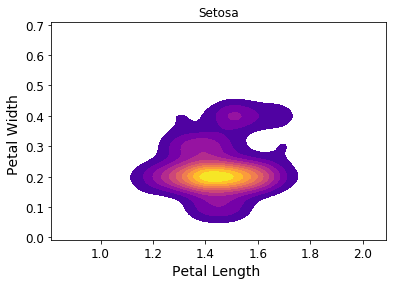

In [31]:
plot=iris[iris['Species']=='setosa']
sns.kdeplot(data=plot[['PetalLeng','PetalWid']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Setosa')
plt.xlabel('Petal Length ')
plt.ylabel('Petal Width ')

C:\Users\ricci\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Petal Width ')

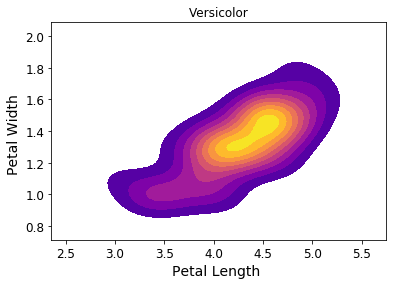

In [32]:
plot=iris[iris['Species']=='versicolor']
sns.kdeplot(data=plot[['PetalLeng','PetalWid']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Versicolor')
plt.xlabel('Petal Length ')
plt.ylabel('Petal Width ')

C:\Users\ricci\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Sepal Width ')

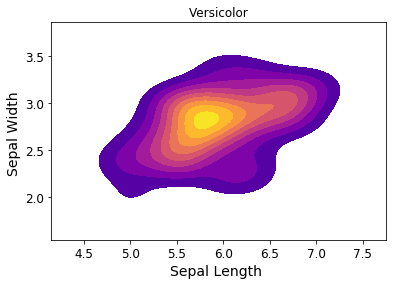

In [33]:
plot=iris[iris['Species']=='versicolor']
sns.kdeplot(data=plot[['SepalLeng','SepalWid']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Versicolor')
plt.xlabel('Sepal Length ')
plt.ylabel('Sepal Width ')

C:\Users\ricci\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Sepal Width ')

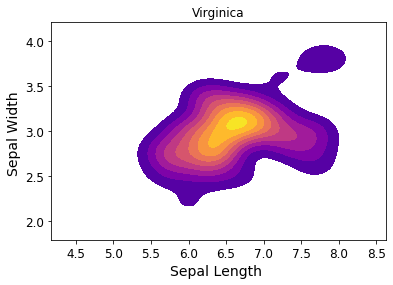

In [34]:
plot=iris[iris['Species']=='virginica']
sns.kdeplot(data=plot[['SepalLeng','SepalWid']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Virginica')
plt.xlabel('Sepal Length ')
plt.ylabel('Sepal Width ')

C:\Users\ricci\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Petal Width ')

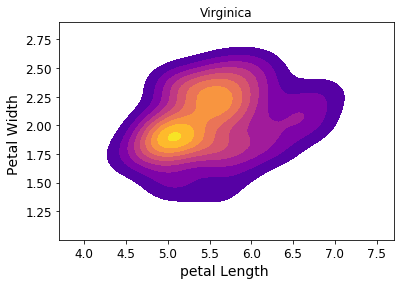

In [35]:
plot=iris[iris['Species']=='virginica']
sns.kdeplot(data=plot[['PetalLeng','PetalWid']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Virginica')
plt.xlabel('petal Length ')
plt.ylabel('Petal Width ')

A valle dei grafici appena prodotti posso dire che:
- per la specie setosa, la ditribuzione bivariata delle dimensioni del sepale sembra essere abbastanza uniforme. Contrariamente per quanto riguarda le dimensioni del petalo si può osservare (secondo grafico) che per la larghezza del petalo ci sono variazioni anche all'interno della stessa classe
- per la specie virginica invece, sembra essere presente un gruppo a se di fiori che di tale specie, che presentano un comportamento molto differenze dalla media per dimensioni di sepalo.

## Training the Decision Tree

**Siamo nel contesto del supervised learning, l'obiettivo è quello di scegliere il modello adatto per classificare tra le 3 specie di iris ai fini di poter fare predizione su una nuova osservazione non presente nel dataset!**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Usiamo GINI... perchè?
**Usiamo l'indice di Gini, in realtà è di default per il metodo DecisionTreeClassifier() di scikitleran, poichè necessitiamo di scegliere come variabili di split quella che più minimizzza la varianza. L'indice di Gini è utilizzato per gli alberi di tipo CART. Un basso valore dell'indice di Gini significa che il nodo è molto vicino ad essere puro. In definitiva, in un problema con K classi, l'indice di Gini ci da una misura di varianza tra le K classi, esso rappresenta una misura di purezza del nodo, i.e. un basso valore mi sta ad indicare che il nodo ha per la maggiore valori tutti appartenenti alla stessa classe.**

Cosa è la misura di entropia?
**La misura di entropia, come l'indice di Gini, è un altro parametro usato per la costruzione di un albero. Minimizzare l'entropia significa rendere le foglie dell'albero quante più pure possibili, questo comporta che l'albero ha ben separato le classi tra di loro. Ciò porta quindi ad ottenere le condizioni di split migliori in situazioni in cui abbiamo un basso valore di entropia. La misura di entropia e l'indice di Gini sono molto simili tra di loro**

## Comprensione routine Decision TreeClassifier
    
Comprendere e se possibile giustificare la scelta dei parametri adottati. 

### Esercizi:

Consiglio generale: fare correre il codice debiggato una prima volta. Conservare i risultati. Modificare i parametri, fare correre il codice di nuovo conservare i risultati, etc... Alla fine confrontare i risultati e discuterli. 

1. Che parametri si sono usati per addestrare l'albero;


2. Cambiare il codice in modo da usare altre feature


3. Confrontare i sisultati che si ottengono cambiando alcune feature. Come effettuare il confronto? Quali indicatori statistici usare? **il confronto lo faccio usando come metrica l'accuracy in ogni esecuzione delle routine, un alta accuracy significa un modello migliore,. Ovviamente in un probema di classificaxione l'accuracy è ciò che viene maggiormente usata. Ad onor del vero, bisogno puntualizzare che una confusion matrix dovrebbe accompagnare tale risultato**


4. Trovare in rete una descrizione dei decision tree e vedere come i parametri teorici sono implementati nella routine che avete usato.


5. Quale versione di Decision Tree avete usato? **scikit learn utilizza la versione CART**


6. Perchè in questa routine lo "informatoion gain" non è il parametro principale? **penso perchè il CART non utilizzi l'information gain come parametro di splitting**


7. Max-depth è settato =2. Cosa ha a che fare con il criterio di stopping e l'overfitting? **un albero troppo espanso è più prono all'overfitting**



In [36]:
from sklearn.tree import DecisionTreeClassifier

columns=['SepalLeng' ,'SepalWid','PetalLeng','PetalWid']
X = iris[columns]
y = iris.Species

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Produrre un file contenente i risultati dell'addestramento 

## Graficare le proprietà dei risultati

Utilizzare routine quali, ad esempio: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

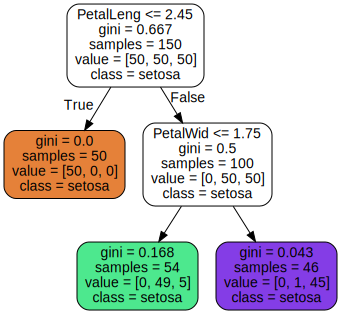

In [37]:
from sklearn.tree import export_graphviz
import graphviz
data=export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=columns,
        class_names=iris.Species,
        rounded=True,
        filled=True
    )
graph = graphviz.Source(data)
graph

### Plottare la struttura dell'albero. 
Usando plot_tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

[Text(133.92000000000002, 181.2, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

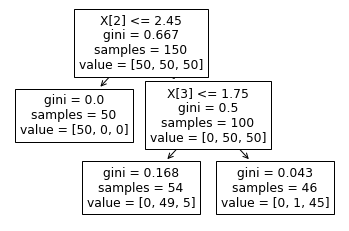

In [38]:
from sklearn import tree
tree.plot_tree(tree_clf)

Saving figure decision_tree_decision_boundaries_plot


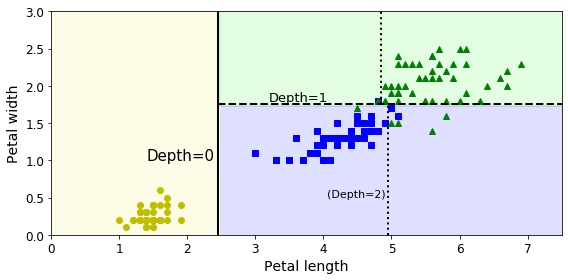

In [39]:
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # capire come funzionano i decision boundaries
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

#### Risolvere il warning (in rosa)
**il warning aveva a che fare con il parametro linewidth, dopo aver provato diversi valori per lo stesso, continuava a comparire, la scelta è stata quindi la rimozione del parametro ed il warning è scomparso**

In [40]:
tree_clf.predict_proba([[5, 1.5]])
tree_clf.predict([[5, 1.5]])

array([1])

In [41]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # view the example that is the widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [42]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2) #find indices of examples that are not the max width
X_tweaked = X[not_widest_versicolor] #create a training set with the widest petals removed
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40) #Retrain
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

Saving figure decision_tree_instability_plot


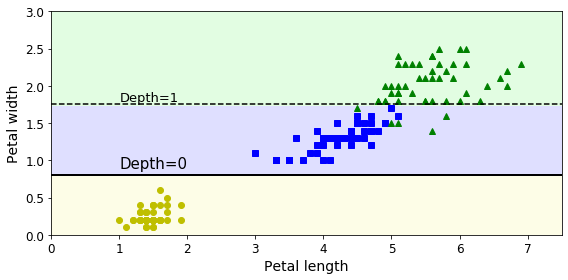

In [43]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--")
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

# Ulteriori prove di addestramento con parametri diversi

Decido di operare sia una modificazione dei paramentri, introduco, ovviamente come è buon norma fare il concetto del train-test split del dataset. Per paragonare le prestazioni degli algoritmi introduco come metrica l'Accuracy. Alla fine presenterò anche un esempio di K-fold CV ed un Random Forest.
Il dataset è relativamente semplice e non presenta dati noisy, quindi mi aspetto che in ogni caso i valori di accuracy in fase di test siano buoni. L'idea è quella di presentare le seguenti metodologie solo ed esclusivamente dal punto di vista didattico e di sperimentazione del codice python.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score


X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [45]:
p_train=tree_clf.predict(X_train)

In [46]:
p_test=tree_clf.predict(X_test)

In [47]:
accuracy_train=accuracy_score(y_train, p_train)

In [48]:
accuracy_test=accuracy_score(y_test, p_test)

In [49]:
f'Accuracy nel train:{np.round(accuracy_train, 4)}-------Accuracy nel test:{np.round(accuracy_test, 4)}'

'Accuracy nel train:0.95-------Accuracy nel test:0.9667'

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


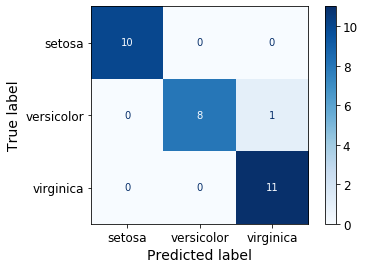

In [50]:

class_names = iris.target_names
disp = plot_confusion_matrix(tree_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show()

In [51]:
np.round(f1_score(y_test, p_test, average='weighted'),4)

0.9664

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_clf.fit(X_train, y_train)
p_train=tree_clf.predict(X_train)
p_test=tree_clf.predict(X_test)
accuracy_train=accuracy_score(y_train, p_train)
accuracy_test=accuracy_score(y_test, p_test)

In [53]:
f'Accuracy nel train:{np.round(accuracy_train,4)}-------Accuracy nel test:{accuracy_test}'
# HO UN ALTO BIAS ED UNA BASSA VARIANZA, UNDERFITTING. ME NE ACCROGO DALLA PERFORMANCE BASSA IN FASE
# DI TRAINING. QUESTO MI FA PENSARE CHE TALE CONDIZIONE MI DIA UN SOSTNZIOSO NUMERO DI FALSI POSITIVI

'Accuracy nel train:0.9905-------Accuracy nel test:1.0'

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


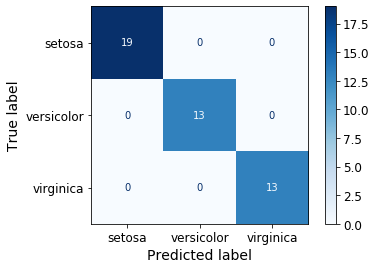

In [54]:

class_names = iris.target_names
disp = plot_confusion_matrix(tree_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show()

In [55]:
np.round(f1_score(y_test, p_test, average='weighted'),4)

1.0

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.5, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_clf.fit(X_train, y_train)
p_train=tree_clf.predict(X_train)
p_test=tree_clf.predict(X_test)
accuracy_train=accuracy_score(y_train, p_train)
accuracy_test=accuracy_score(y_test, p_test)

In [57]:
f'Accuracy nel train:{np.round(accuracy_train,4)}-------Accuracy nel test:{np.round(accuracy_test, 4)}'

'Accuracy nel train:0.9867-------Accuracy nel test:0.9733'

[[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]


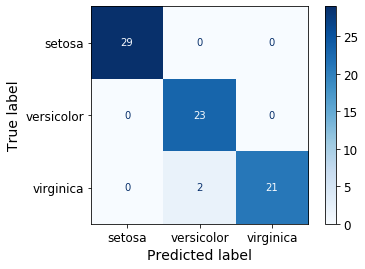

In [58]:

class_names = iris.target_names
disp = plot_confusion_matrix(tree_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show()

In [59]:
np.round(f1_score(y_test, p_test, average='weighted'),4)

0.9733

In [60]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy',random_state=42)
tree_clf.fit(X_train, y_train)
p_train=tree_clf.predict(X_train)
p_test=tree_clf.predict(X_test)
accuracy_train=accuracy_score(y_train, p_train)
accuracy_test=accuracy_score(y_test, p_test)

In [61]:
f'Accuracy nel train:{np.round(accuracy_train,4)}-------Accuracy nel test:{np.round(accuracy_test, 4)}'

# HO UN ALTO BIAS ED UNA BASSA VARIANZA, UNDERFITTING. ME NE ACCROGO DALLA PERFORMANCE BASSA IN FASE
# DI TRAINING. QUESTO MI FA PENSARE CHE TALE CONDIZIONE MI DIA UN SOSTNZIOSO NUMERO DI FALSI POSITIVI

'Accuracy nel train:0.9429-------Accuracy nel test:1.0'

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


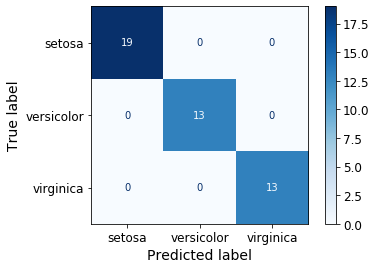

In [62]:


class_names = iris.target_names
disp = plot_confusion_matrix(tree_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show()

In [63]:
np.round(f1_score(y_test, p_test, average='weighted'),4)

1.0

In [64]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=None, criterion='entropy',random_state=42)
tree_clf.fit(X_train, y_train)
p_train=tree_clf.predict(X_train)
p_test=tree_clf.predict(X_test)
accuracy_train=accuracy_score(y_train, p_train)
accuracy_test=accuracy_score(y_test, p_test)

In [65]:
f'Accuracy nel train:{np.round(accuracy_train,4)}-------Accuracy nel test:{np.round(accuracy_test, 4)}'

'Accuracy nel train:0.9917-------Accuracy nel test:1.0'

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


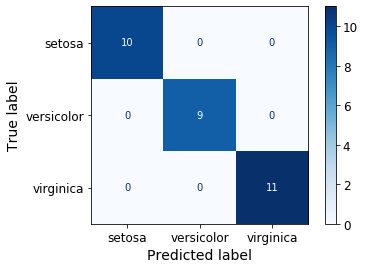

In [66]:

class_names = iris.target_names
disp = plot_confusion_matrix(tree_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show()

In [67]:
np.round(f1_score(y_test, p_test, average='weighted'),4)

1.0

In [84]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.5, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=None, criterion='entropy',random_state=42)
tree_clf.fit(X_train, y_train)
p_train=tree_clf.predict(X_train)
p_test=tree_clf.predict(X_test)
accuracy_train=accuracy_score(y_train, p_train)
accuracy_test=accuracy_score(y_test, p_test)

In [85]:
f'Accuracy nel train:{np.round(accuracy_train,4)}-------Accuracy nel test:{np.round(accuracy_test, 4)}'

'Accuracy nel train:0.9867-------Accuracy nel test:0.9333'

[[29  0  0]
 [ 0 23  0]
 [ 0  5 18]]


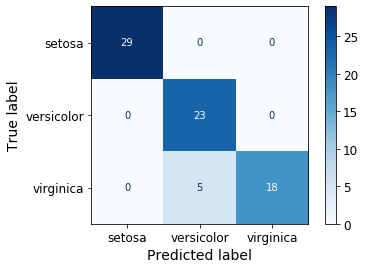

In [86]:

class_names = iris.target_names
disp = plot_confusion_matrix(tree_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show()

In [87]:
np.round(f1_score(y_test, p_test, average='weighted'),4)

0.9325

# K-Fold CV

In [72]:
from sklearn.model_selection import cross_val_score
tree_clf = DecisionTreeClassifier(max_depth=None, random_state=42)
elements=range(5,11)
cv_scores=[]
for el in elements:
    scores=cross_val_score(tree_clf, X, y, cv=el ) #sto usando un CART
    cv_scores.append(np.round(scores,decimals=3))
    
print(cv_scores)

[array([0.967, 0.967, 0.9  , 0.967, 1.   ]), array([0.96, 1.  , 0.92, 0.88, 0.92, 1.  ]), array([0.955, 1.   , 0.909, 0.905, 0.952, 0.952, 1.   ]), array([1.   , 0.947, 1.   , 0.895, 0.842, 0.947, 0.944, 1.   ]), array([1.   , 0.941, 1.   , 0.882, 0.941, 0.765, 0.875, 1.   , 1.   ]), array([1.   , 0.933, 1.   , 0.933, 0.933, 0.8  , 0.933, 0.933, 1.   ,
       1.   ])]


In [73]:
values=[]
for el in cv_scores:
    value=np.mean(el)
    values.append(np.round(value,decimals=3))

print(values)
print(np.mean(values))

[0.96, 0.947, 0.953, 0.947, 0.934, 0.946]
0.9478333333333332


# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
forest_clf=RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
y_pred=forest_clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

In [79]:
f'accuracy: {np.round(accuracy,4)}'

'accuracy: 1.0'

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


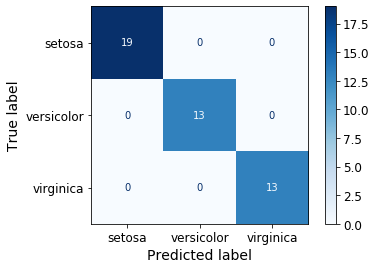

In [81]:
class_names = iris.target_names
disp = plot_confusion_matrix(forest_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)

plt.show()

In [83]:
np.round(f1_score(y_test, y_pred, average='weighted'),4)

1.0